In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [7]:
## checking for missing values
df.isnull().sum() ## or df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Insights or conclusion: No missing values

In [14]:
## checking for duplicate values
df.duplicated().sum()

0

## conclusion or insights: No duplicated values

In [15]:
## check datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [23]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [ ]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


 ## Observations or insights: 
 => from the above description of numerical data all means are very close to each other between 66 and 69
 
 => all the standard deviation are also close between 14.6-15.19
 
 => while there is a minimum of 0 for maths, other are having 17 and 10 value

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
## segregate the numerical values and categorical values
numerical_value = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_value = [feature for feature in df.columns if df[feature].dtype=='O']

In [32]:
categorical_value

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [34]:
numerical_value

['math_score', 'reading_score', 'writing_score']

In [36]:
## aggregate the total score
df['total_score'] = (df['math_score']+df['reading_score']+df['writing_score'])
df['Average_score'] = df['total_score']/3

In [37]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


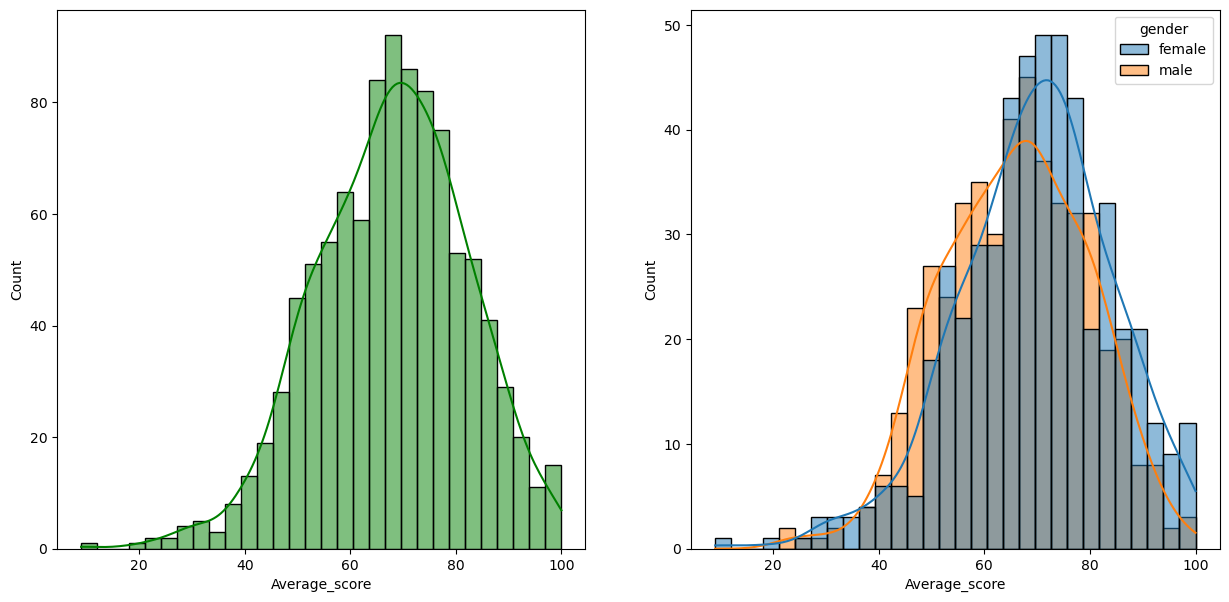

In [39]:
fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="Average_score",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_score',bins=30,kde=True,hue='gender')
plt.show()

## Insights: 
 Female students tends to perform better than male students

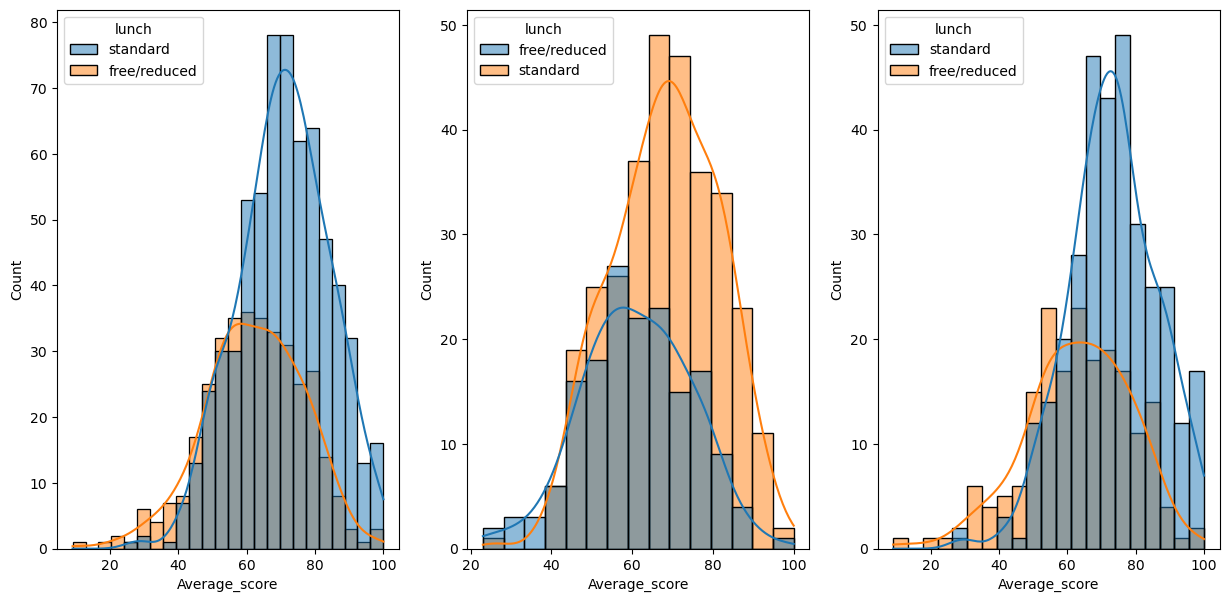

In [41]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='Average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='lunch')
plt.show()

## insights: 
standard lunch helps students to get high average or helps students to perform in exams for both male and female

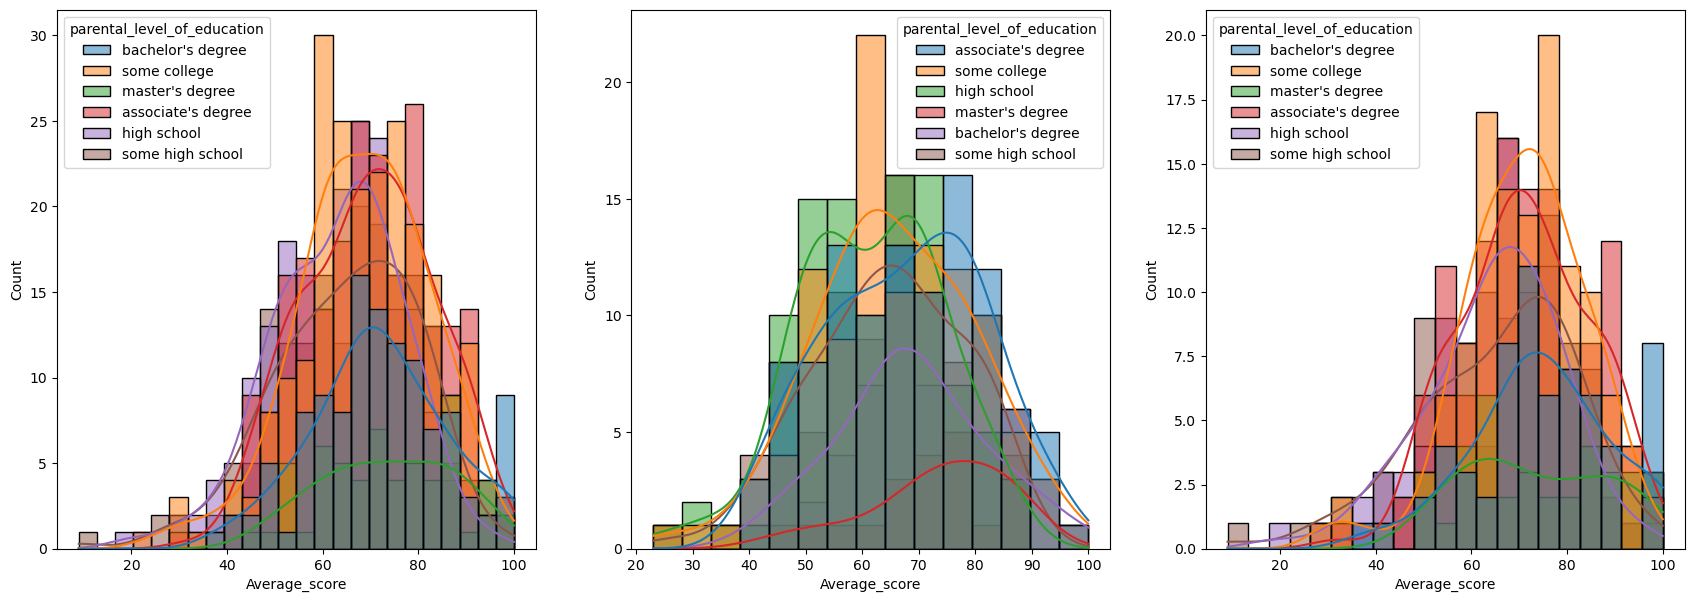

In [43]:
plt.subplots(1,3,figsize=(21,7))
plt.subplot(131)
ax = sns.histplot(data=df,x="Average_score",hue='parental_level_of_education',kde=True)
plt.subplot(132)
ax = sns.histplot(data=df[df.gender=='male'],x="Average_score",hue='parental_level_of_education',kde=True)
plt.subplot(133)
ax = sns.histplot(data=df[df.gender=='female'],x="Average_score",hue='parental_level_of_education',kde=True)
plt.show()

## Insights:
-> In general parent's education dont help student to perform well in exam

-> 2nd plot shows that parents whose education is of assoicate degree or masters degree their male child tend to perform well in exam

-> 3rd plot we can see there is no effect of parents education on female students.